In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATASET USED : [CREDIT CARD FRAUD DETECTION DATASET](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/My Drive/Credit Card Fraud Detection Dataset/creditcard.csv'

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Check for the categorical features

In [8]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Time: 124592 unique values
V1: 275663 unique values
V2: 275663 unique values
V3: 275663 unique values
V4: 275663 unique values
V5: 275663 unique values
V6: 275663 unique values
V7: 275663 unique values
V8: 275663 unique values
V9: 275663 unique values
V10: 275663 unique values
V11: 275663 unique values
V12: 275663 unique values
V13: 275663 unique values
V14: 275663 unique values
V15: 275663 unique values
V16: 275663 unique values
V17: 275663 unique values
V18: 275663 unique values
V19: 275663 unique values
V20: 275663 unique values
V21: 275663 unique values
V22: 275663 unique values
V23: 275663 unique values
V24: 275663 unique values
V25: 275663 unique values
V26: 275663 unique values
V27: 275663 unique values
V28: 275663 unique values
Amount: 32767 unique values
Class: 2 unique values


This dataset has no categorical features

Check for Null values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


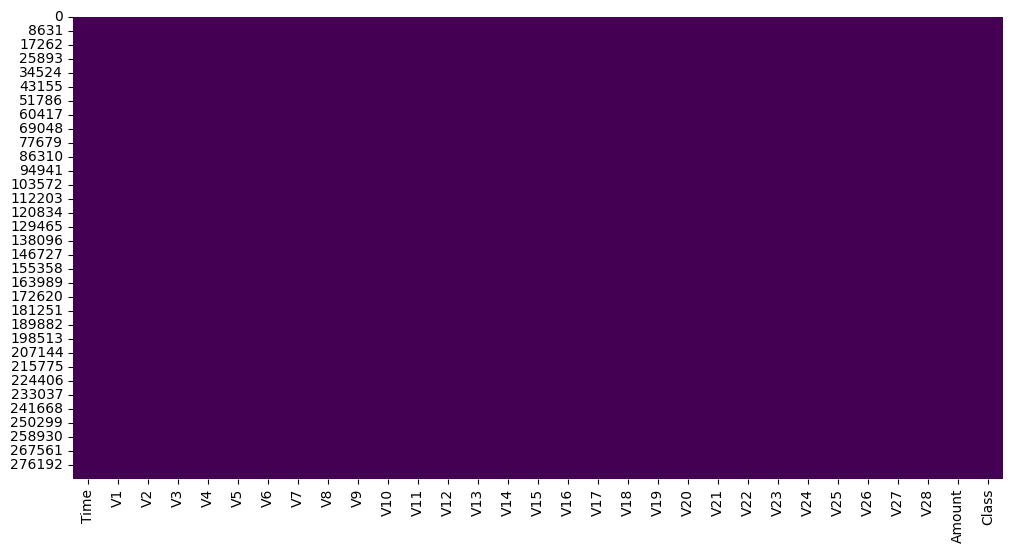

In [9]:
null_values=df.isnull().sum()
print(null_values)

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.show()

In [10]:
df.fillna(df.median(), inplace=True)

In [11]:
null_values=df.isnull().sum()
print(null_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Now the dataset doesnot have any missing or null value

Correlational Analysis

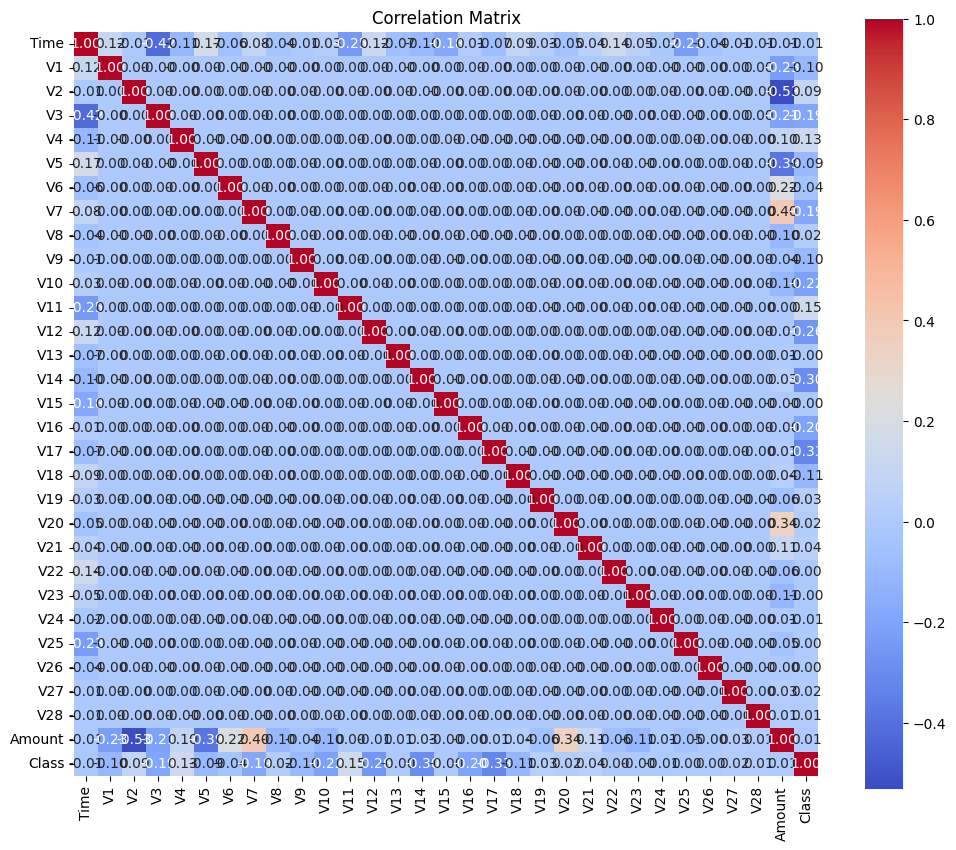

In [12]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
threshold=0.85
high_corr_pairs=[]

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value=corr_matrix.iloc[i, j]
        if abs(corr_value)>threshold:
            col1=corr_matrix.columns[i]
            col2=corr_matrix.columns[j]
            high_corr_pairs.append((col1,col2,corr_value))

In [14]:
print("High Correlation Pairs:", high_corr_pairs)

High Correlation Pairs: []


There is no strongly correlated features in dataset

Fraud vs Legitimate cases

<ipython-input-15-384dfa89cf20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette=['blue', 'red'])


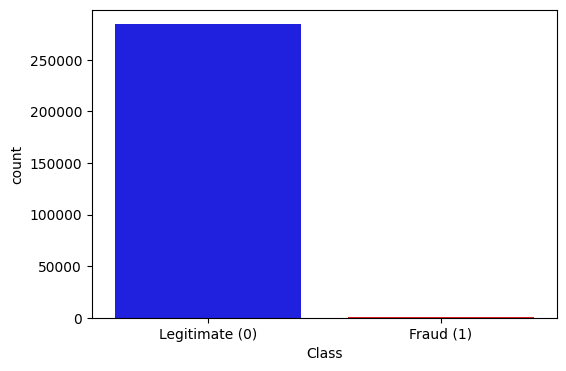

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Class'], palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraud (1)'])
plt.show()

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [17]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train.loc[:,['Amount','Time']]=rob_scaler.fit_transform(X_train[['Amount','Time']])
X_test.loc[:,['Amount','Time']]=rob_scaler.transform(X_test[['Amount','Time']])

In [18]:
import joblib
joblib.dump(rob_scaler, "scaler.pkl")

['scaler.pkl']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

log_reg_params={
    "penalty":['l1', 'l2'],
    "C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver":['liblinear']
}

random_log_reg=RandomizedSearchCV(LogisticRegression(),log_reg_params,n_iter=4,random_state=42)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []

for train_idx, test_idx in sss.split(X_train, y_train):

    X_train_fold,X_test_fold=X_train.iloc[train_idx],X_train.iloc[test_idx]
    y_train_fold,y_test_fold=y_train.iloc[train_idx],y_train.iloc[test_idx]

    pipeline = make_pipeline(SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=1),random_log_reg)

    model = pipeline.fit(X_train_fold,y_train_fold)
    best_model = random_log_reg.best_estimator_
    predictions = best_model.predict(X_test_fold)

    accuracy_lst.append(best_model.score(X_test_fold, y_test_fold))
    precision_lst.append(precision_score(y_test_fold, predictions))
    recall_lst.append(recall_score(y_test_fold, predictions))
    f1_lst.append(f1_score(y_test_fold, predictions))
    auc_lst.append(roc_auc_score(y_test_fold, predictions))

In [21]:
print("Accuracy: {:.4f}".format(np.mean(accuracy_lst)))
print("Precision: {:.4f}".format(np.mean(precision_lst)))
print("Recall: {:.4f}".format(np.mean(recall_lst)))
print("F1-score: {:.4f}".format(np.mean(f1_lst)))
print("AUC Score: {:.4f}".format(np.mean(auc_lst)))

Accuracy: 0.9745
Precision: 0.0584
Recall: 0.9038
F1-score: 0.1097
AUC Score: 0.9392


 Area Under the Precision-Recall Curve (AUPRC)

Area Under Precision-Recall Curve (AUPRC):0.7132


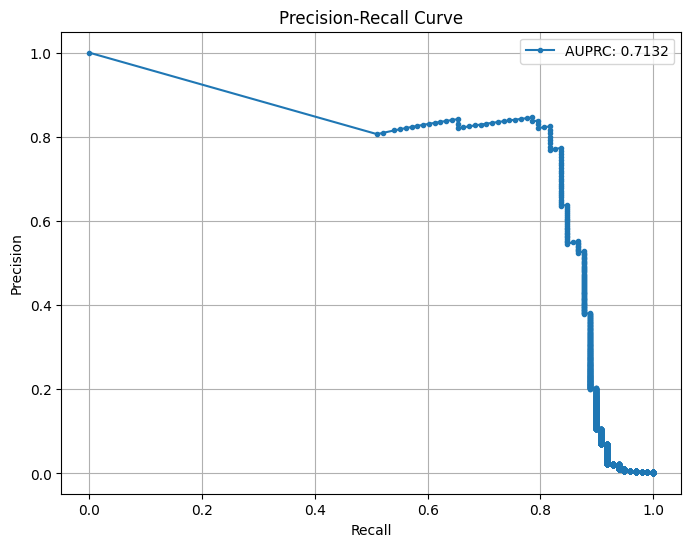

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_probs=best_model.predict_proba(X_test)[:,1]
precision,recall,_=precision_recall_curve(y_test,y_probs)

auprc_score=average_precision_score(y_test,y_probs)
print(f"Area Under Precision-Recall Curve (AUPRC):{auprc_score:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(recall,precision,marker='.',label=f"AUPRC: {auprc_score:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

Confusion Matrix and Classfication Report

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[55457  1407]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [24]:
joblib.dump(best_model,"credit_card_fraud_detection_model.pkl")

['credit_card_fraud_detection_model.pkl']

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:10:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


XGBoost AUPRC: 0.8773


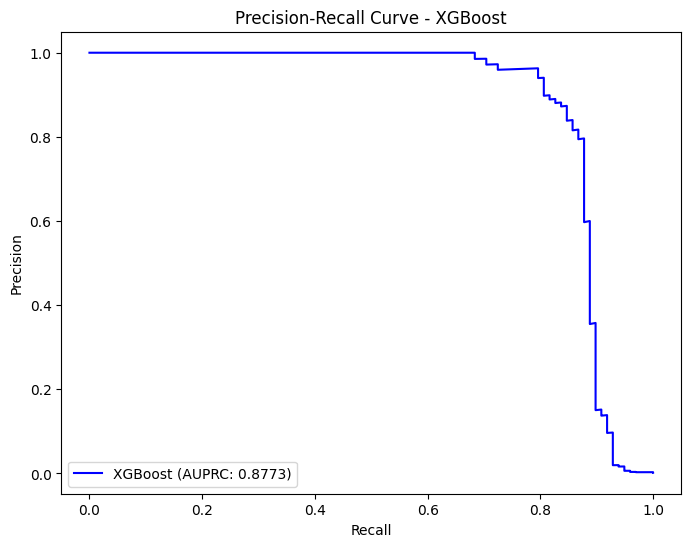

Best XGBoost model saved as model_xgb.pkl


In [25]:
import xgboost as xgb
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model=xgb.XGBClassifier(
    scale_pos_weight=9,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_params={
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(xgb_model,xgb_params,n_iter=10,scoring='average_precision',cv=5,random_state=42,n_jobs=-1)
rand_xgb.fit(X_train_scaled, y_train)

best_xgb = rand_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_scaled)
y_prob_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb))

precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
auprc_score = auc(recall, precision)
print(f"\nXGBoost AUPRC: {auprc_score:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'XGBoost (AUPRC: {auprc_score:.4f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend()
plt.show()

joblib.dump(best_xgb, "model_xgb.pkl")
print("Best XGBoost model saved as model_xgb.pkl")